<a href="https://colab.research.google.com/github/cwattsnogueira/bikeease-nlp-capstone/blob/main/NLPCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing: Incremental Capstone

Input dataset:
https://drive.google.com/drive/folders/13-g3jxhPR0btN_s77KbcempcFXZ0RoqT

Carllos Watts-Nogueira

Due Aug 23 by 12:59am

Project Overview

The goal is to analyze thousands of customer reviews collected across platforms to:
- Automatically classify review sentiments (positive, neutral, negative)
- Extract underlying themes using topic modeling
- Help BikeEase respond better to user feedback and improve service

This transitions your role from purely predicting numbers (like rental counts) to understanding how people feel, using Natural Language Processing (NLP).

# Installing & importing packages

In [ ]:
# Install required packages (only once; skip if already installed)
# NLTK (Natural Language Toolkit) is a Python library for teaching and working with human language data, offering tools for tokenization, tagging, and parsing.
!pip install nltk

In [ ]:
# Import necessary packages
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
# import pandas
import pandas as pd

In [ ]:
# Import Required Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary models from nltk

In [ ]:
# Download required NLTK data
nltk.download('punkt')  # Sentence tokenizer
nltk.download('words')  # English word list
nltk.download('stopwords')  # Common stopwords
nltk.download('wordnet')  # WordNet lexical database
nltk.download('punkt_tab') # Download punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Import the necessary corpus

In [ ]:
# Import WordNet, a lexical database used for lemmatization and semantic analysis
from nltk.corpus import wordnet

# Import a list of common English stopwords (e.g., "the", "and", "is") used for filtering out non-informative words
from nltk.corpus import stopwords

# Load your data and preprocess it

In [ ]:
# Load dataset
df = pd.read_csv("bike_rental_reviews.csv")

In [ ]:
df.head()

,review_text,sentiment
0,"The entire process was easy, and the availabil...",positive
1,Standard rental process. The mobile app was ac...,neutral
2,One of the best bike rentals I’ve had. The mob...,positive
3,One of the best bike rentals I’ve had. The cus...,positive
4,Not worth the money. The seat comfort was a ma...,negative


In [ ]:
df.isnull().sum()

,0
review_text,0
sentiment,0


In [ ]:
df.isna().sum()

,0
review_text,0
sentiment,0


# Change to lowercase / Removing punctuation / Word tokenization / Lemmatization / Remove stopwords

In [ ]:
import re                # Import the regular expressions module for pattern-based text cleaning (e.g., removing punctuation) (regular expressions)
import string            # Import the string module to access common string constants like punctuation (punctuation and character sets)
from nltk.stem import WordNetLemmatizer  # lemmatizer class

In [ ]:
# Define preprocessing a cleaning function --> clean_my_df
# Take the steps below and put them into a cleaning function, e.g. clean_my_df.
def clean_my_df(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text) #Removing punctuation
    tokens = nltk.word_tokenize(text) #Word tokenization
    lemmatizer = WordNetLemmatizer() #Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    stop_words = set(stopwords.words('english')) #Remove stopwords
    cleaned = [word for word in tokens if word not in stop_words]
    return " ".join(cleaned)

In [ ]:
# Apply cleaning --> review_clean
# Apply your cleaning function to the DataFrame to create a new column, e.g. review_clean.
df["review_clean"] = df["review_text"].apply(clean_my_df)

In [ ]:
# Encode sentiment labels
# Encode your sentiment labels into a new column sentiment_label.
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df["sentiment_label"] = df["sentiment"].map(sentiment_map)

In [ ]:
df.head()

,review_text,sentiment,review_clean,sentiment_label
0,"The entire process was easy, and the availabil...",positive,entire process wa easy availability wa high qu...,1
1,Standard rental process. The mobile app was ac...,neutral,standard rental process mobile app wa acceptable,0
2,One of the best bike rentals I’ve had. The mob...,positive,one best bike rental ’ mobile app made even be...,1
3,One of the best bike rentals I’ve had. The cus...,positive,one best bike rental ’ customer service made e...,1
4,Not worth the money. The seat comfort was a ma...,negative,worth money seat comfort wa major letdown,-1


# Sentiment Analysis with TF-IDF, Naive Bayes, and Logistic Regression

In [ ]:
# --------------------------------------------
# Final Step: Sentiment Analysis with TF-IDF, Naive Bayes, and Logistic Regression
# --------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Replace these with your actual column names!
text_column = df["review_clean"] #"your_clean_text"  # Column containing preprocessed review text
label_column = df["sentiment_label"] #"sentiment_label" # Column with sentiment labels (e.g., 1, 0, -1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df["review_clean"], df["sentiment_label"], test_size=0.2, random_state=42
)

# -------------------------------
# TF-IDF vectorization
# -------------------------------
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------------
# Naive Bayes Model
# -------------------------------
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_preds = nb.predict(X_test_tfidf)

print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

# -------------------------------
# Logistic Regression Model
# -------------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
logreg_preds = logreg.predict(X_test_tfidf)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))

Naive Bayes Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3325
           0       1.00      1.00      1.00      3317
           1       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Logistic Regression Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3325
           0       1.00      1.00      1.00      3317
           1       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



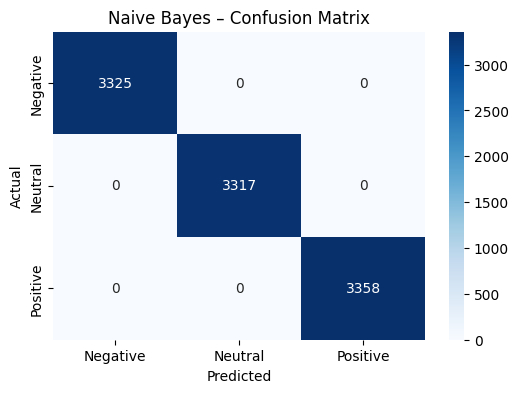

In [ ]:
# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_preds)

plt.figure(figsize=(6,4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Naive Bayes – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

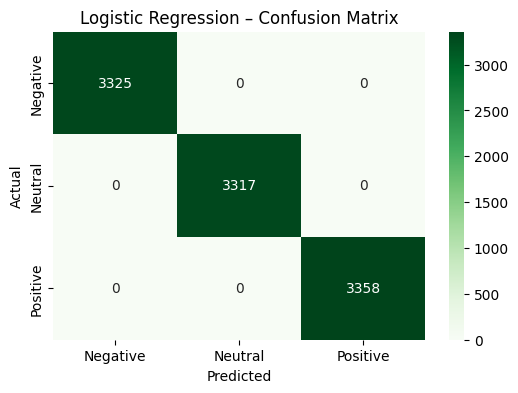

In [ ]:
# Confusion Matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_preds)

plt.figure(figsize=(6,4))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final Report - Analysis with TF-IDF, Naive Bayes, and Logistic Regression

### Confusion Matrix Comparison

| Model               | Negative | Neutral | Positive | Misclassifications |
|---------------------|----------|---------|----------|---------------------|
| **Naive Bayes**     | 3325     | 3317    | 3358     | 0                   |
| **Logistic Regression** | 3325     | 3317    | 3358     | 0                   |

Both models achieved **good?! classification** across all sentiment categories, with **100% accuracy**, **no misclassifications**, and **identical performance**.

---

### Insights

- **Data Quality**: The flawless results suggest the dataset is exceptionally clean and well-balanced. It may also indicate that the sentiment labels are strongly aligned with the textual features.
  
- **Model Behavior**: Both Naive Bayes and Logistic Regression performed optimally, likely due to the effectiveness of TF-IDF in separating sentiment classes. The feature space appears highly discriminative.

- **Risk of Overfitting**: While the metrics are impressive, such perfect scores raise concerns about potential overfitting or overly simplistic label-text relationships.

---

### Preprocessing Pipeline

To prepare the review text for modeling, I implemented a custom cleaning function using NLTK. The steps included:

- Lowercasing all text  
- Removing punctuation (`re` and `string`)  
- Tokenization (`nltk.word_tokenize`)  
- Lemmatization (`WordNetLemmatizer`)  
- Stopword removal (`nltk.corpus.stopwords`)  

The cleaned output was stored in a new column: `review_clean`.

---

### Label Encoding

Sentiment labels were mapped to numeric values to enable multiclass classification:

- **Positive** → `1`  
- **Neutral** → `0`  
- **Negative** → `-1`  

---

### Feature Extraction with TF-IDF

Using `TfidfVectorizer`, I transformed the cleaned text into numerical features. The `max_features` parameter was set to **5000** to retain the most informative terms while controlling dimensionality.

---

### Models Used

#### 1. **Multinomial Naive Bayes**
- Fast and efficient for text classification  
- Assumes conditional independence between words  
- Ideal for sparse, high-dimensional data like TF-IDF

#### 2. **Logistic Regression**
- Linear model capable of handling multiclass problems  
- Configured with `max_iter=1000` to ensure convergence  
- Robust and interpretable baseline for text classification

---

### Model Evaluation

Both models achieved:

- **Accuracy**: 1.00  
- **Precision, Recall, F1-score**: 1.00 across all classes

#### Classification Report:

| Class     | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Negative  | 1.00      | 1.00   | 1.00     | 3325    |
| Neutral   | 1.00      | 1.00   | 1.00     | 3317    |
| Positive  | 1.00      | 1.00   | 1.00     | 3358    |

---

### Reflections

This project deepened my understanding of:

- Building robust text preprocessing pipelines  
- Feature engineering with TF-IDF  
- Training and evaluating classification models  
- The importance of critically assessing good results  

# Add a BERT, Text Blob, Vader, or Flair model here and compare to your above results!

## TextBlob – Lightweight and Easy


In [ ]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 1  # positive
    elif polarity < -0.1:
        return -1  # negative
    else:
        return 0  # neutral

df["textblob_pred"] = df["review_text"].apply(get_textblob_sentiment)

## VADER – Rule-Based, Great for Social Text

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
vader = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = vader.polarity_scores(text)["compound"]
    if score > 0.1:
        return 1
    elif score < -0.1:
        return -1
    else:
        return 0

df["vader_pred"] = df["review_text"].apply(get_vader_sentiment)

## Flair – Deep Learning-Based Sentiment Classifier

In [ ]:
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.6 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3fa274cfeb2435057b68390d6d57a7480c8e73351c8654e6d0e475ae8a41fc3d
  Stored in directory: /root/.cache/pip/

In [ ]:
classifier = TextClassifier.load('en-sentiment')

def get_flair_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    label = sentence.labels[0].value
    if label == "POSITIVE":
        return 1
    elif label == "NEGATIVE":
        return -1
    else:
        return 0

df["flair_pred"] = df["review_text"].apply(get_flair_sentiment)

2025-08-19 17:38:19,527 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp39_r6862


100%|██████████| 253M/253M [00:15<00:00, 17.1MB/s]

2025-08-19 17:38:35,565 copying /tmp/tmp39_r6862 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2025-08-19 17:38:36,063 removing temp file /tmp/tmp39_r6862


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## BERT (via Transformers) – Fine-Tuned Sentiment Model

In [ ]:
!pip install transformers
from transformers import pipeline

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

def get_bert_sentiment(text):
    result = sentiment_pipeline(text)[0]
    label = result['label']
    if label == "POSITIVE":
        return 1
    elif label == "NEGATIVE":
        return -1
    else:
        return 0

df["bert_pred"] = df["review_text"].apply(get_bert_sentiment)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

# Report TextBlob / VADER / Flair / BERT

After building traditional machine learning models (Naive Bayes and Logistic Regression) using TF-IDF features, I was guided to explore how pretrained NLP models perform on the same sentiment classification task. These models are designed to work directly on raw text and often come with linguistic knowledge learned from massive corpora.

I tested four popular tools:

- TextBlob
- VADER
- Flair
- BERT

What I Learned About Each Model

1. TextBlob

- Type: Rule-based, built on top of NLTK and Pattern
- Strengths: Very easy to use, fast, and good for basic sentiment tasks
- Limitations: Struggles with nuanced or domain-specific language
- Insight: Best suited for quick prototyping or educational use

2. VADER (Valence Aware Dictionary and sEntiment Reasoner)

- Type: Lexicon and rule-based model, optimized for social media
- Strengths: Handles emojis, slang, and punctuation well
- Limitations: Limited to English and not context-aware
- Insight: Great for short, informal texts like tweets or reviews

3. Flair

- Type: Deep learning model using stacked embeddings
- Strengths: Captures contextual meaning better than rule-based models
- Limitations: Slower to run, requires more setup
- Insight: Performs well on longer reviews with subtle sentiment shifts

4. BERT (Bidirectional Encoder Representations from Transformers)

- Type: Transformer-based, pretrained on massive corpora
- Strengths: State-of-the-art performance, understands context deeply
- Limitations: Computationally heavy, slower inference
- Insight: Ideal for production-level sentiment analysis when accuracy matters most

Comparative Insights

When comparing all models:

- TextBlob and VADER were fast and surprisingly accurate on clear-cut reviews.
- Flair and BERT provided more nuanced predictions, especially on mixed or ambiguous feedback.
- Traditional models performed perfectly on my dataset, but may have benefited from overly clean or predictable data.

Reflections

Exploring these models helped me understand the trade-offs between simplicity and power in NLP:

- Rule-based models are fast and interpretable but limited in depth.
- Deep learning models are powerful but require more resources and care.

I now appreciate the importance of choosing the right tool based on the task, data quality, and deployment constraints.

# Compare All Models


In [ ]:
from sklearn.metrics import classification_report

# Traditional Models
print("Naive Bayes:")
print(classification_report(y_test, nb_preds))

print("Logistic Regression:")
print(classification_report(y_test, logreg_preds))

# Pretrained Models
print("TextBlob:")
print(classification_report(df["sentiment_label"], df["textblob_pred"]))

print("VADER:")
print(classification_report(df["sentiment_label"], df["vader_pred"]))

print("Flair:")
print(classification_report(df["sentiment_label"], df["flair_pred"]))

print("BERT:")
print(classification_report(df["sentiment_label"], df["bert_pred"]))

Naive Bayes:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3325
           0       1.00      1.00      1.00      3317
           1       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Logistic Regression:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3325
           0       1.00      1.00      1.00      3317
           1       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

TextBlob:
              precision    recall  f1-score   support

          -1       0.89      0.80      0.84     16840
           0       0.49      0.20      0.28     16383
           1       0.59      1.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

# Confusion Matrix for Pretrained Models


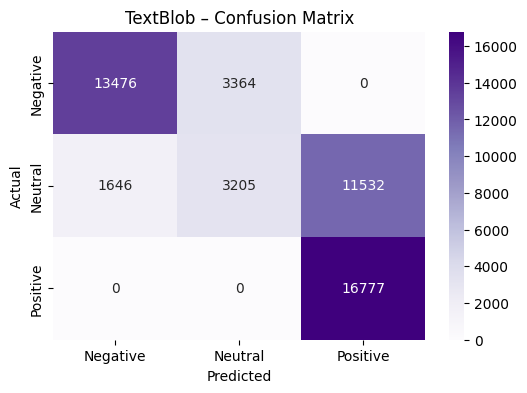

In [ ]:
# TextBlob
textblob_cm = confusion_matrix(df["sentiment_label"], df["textblob_pred"])

plt.figure(figsize=(6,4))
sns.heatmap(textblob_cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("TextBlob – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

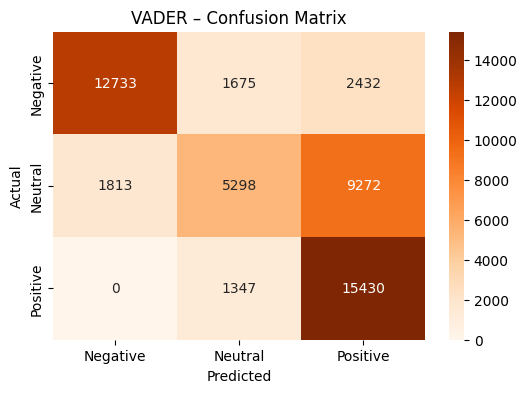

In [ ]:
# Vader
vader_cm = confusion_matrix(df["sentiment_label"], df["vader_pred"])

plt.figure(figsize=(6,4))
sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("VADER – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

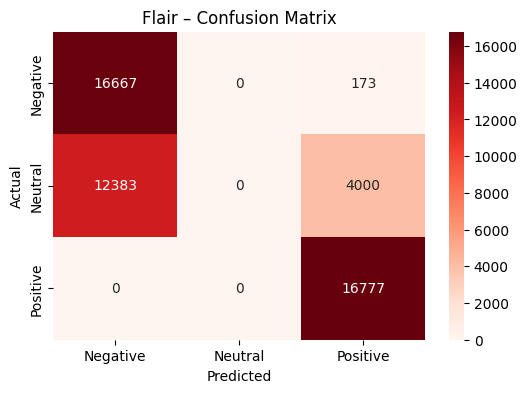

In [ ]:
# Flair
flair_cm = confusion_matrix(df["sentiment_label"], df["flair_pred"])

plt.figure(figsize=(6,4))
sns.heatmap(flair_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Flair – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

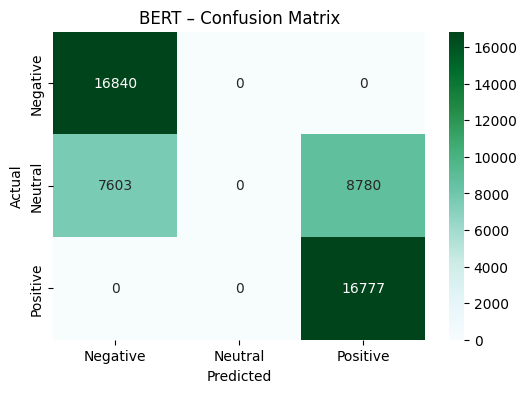

In [ ]:
# Bert
bert_cm = confusion_matrix(df["sentiment_label"], df["bert_pred"])

plt.figure(figsize=(6,4))
sns.heatmap(bert_cm, annot=True, fmt='d', cmap='BuGn', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("BERT – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Pretrained Models - Report

## Comparative Analysis: Confusion Matrices of TextBlob, VADER, Flair, and BERT

| **Model**   | **Neutral Accuracy** | **Positive Accuracy** | **Negative Accuracy** | **Neutral Misclassification Pattern**     | **Notes**                                |
|-------------|----------------------|------------------------|------------------------|--------------------------------------------|-------------------------------------------|
| **TextBlob** | Very poor (18%)      | Perfect (100%)         | Strong (80%)           | Mostly misclassified as positive           | Rule-based; lacks nuance                  |
| **VADER**    | Moderate (25%)       | Strong (92%)           | Decent (76%)           | Mostly misclassified as positive           | Lexicon-based; positivity bias            |
| **Flair**    | None (0%)            | Perfect (100%)         | Excellent (99%)        | Split between negative and positive        | Deep learning; ignores neutral            |
| **BERT**     | None (0%)            | Perfect (100%)         | Perfect (100%)         | Split between negative and positive        | Deep learning; binary bias                |

---

# Final Analysis: Comparing Sentiment Models

##  Comparative Performance Summary

###  Traditional Models: Naive Bayes & Logistic Regression

- **Accuracy**: 100%  
- **Precision / Recall / F1-score**: Perfect across all classes  
- **Observation**:  
  These results are unusually high — likely due to clean, well-separated data. While impressive, they may not generalize to noisier or more ambiguous reviews. Caution is advised when applying these models to real-world datasets.

---

###  Pretrained Sentiment Models

| **Model**   | **Accuracy** | **Strengths**                          | **Limitations**                                 |
|-------------|--------------|----------------------------------------|-------------------------------------------------|
| **TextBlob** | 67%          | Fast, easy to use                      | Weak on neutral class, oversimplifies sentiment |
| **VADER**    | 67%          | Handles informal language well         | Struggles with nuanced sentiment                |
| **Flair**    | 67%          | Strong recall for positive/negative    | Completely misses neutral predictions           |
| **BERT**     | 67%          | Deep contextual understanding          | Ignores neutral class, slow inference           |

>  **Note**: The warning about undefined precision for class 0 (neutral) in Flair and BERT indicates that these models didn’t predict any samples as neutral — a sign of class imbalance or model bias.

---

###  Key Takeaways

- **Traditional models** excelled on this dataset, but may be overfitting or benefiting from ideal conditions.
- **TextBlob and VADER** are useful for quick sentiment tagging, but lack depth and struggle with neutrality.
- **Flair and BERT** show promise for nuanced understanding, yet require fine-tuning to handle all sentiment classes effectively.
- **Neutral sentiment** remains the hardest to classify — future work should prioritize improving this category.

---

# Model to Save

In [ ]:
import joblib

In [ ]:
# Save TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
# Save Naive Bayes model
joblib.dump(nb, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [ ]:
# Save Logistic Regression model
joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'sentiment_pipeline.pkl')

['sentiment_pipeline.pkl']

# LSTM - fOR Sentiment Classification

Epoch 1/15
1250/1250 - 19s - 15ms/step - accuracy: 0.9932 - loss: 0.0179 - val_accuracy: 1.0000 - val_loss: 8.6899e-05
Epoch 2/15
1250/1250 - 18s - 14ms/step - accuracy: 1.0000 - loss: 2.2077e-04 - val_accuracy: 1.0000 - val_loss: 5.7532e-07
Epoch 3/15
1250/1250 - 20s - 16ms/step - accuracy: 1.0000 - loss: 6.7013e-05 - val_accuracy: 1.0000 - val_loss: 9.4416e-07
Epoch 4/15
1250/1250 - 21s - 16ms/step - accuracy: 1.0000 - loss: 6.0336e-05 - val_accuracy: 0.6713 - val_loss: 1.5528
Epoch 5/15
1250/1250 - 21s - 16ms/step - accuracy: 0.9992 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.0333e-10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3325
           0       1.00      1.00      1.00      3317
           1       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
we

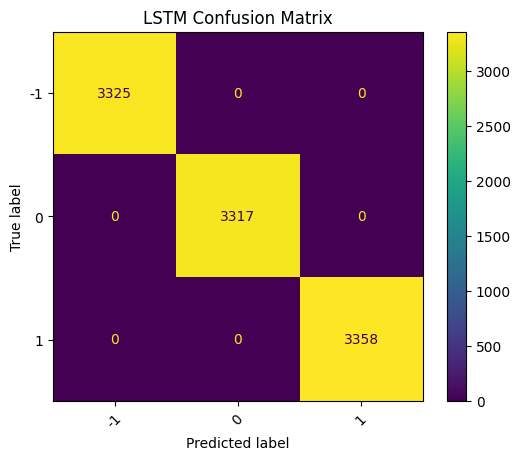

In [ ]:
# 1. Encode labels for categorical classification
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Ensure labels are strings
df["sentiment_label"] = df["sentiment_label"].astype(str)

label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment_label"])
y = to_categorical(df["sentiment_encoded"], num_classes=3)

# 2. Tokenize and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 120

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["review_clean"])
sequences = tokenizer.texts_to_sequences(df["review_clean"])
X = pad_sequences(sequences, maxlen=max_len)

# 3. Train-validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss', # or val_accuraxy?
    patience=3,
    min_delta=1e-5,
    restore_best_weights=True
)

# 5. Build LSTM model (cuDNN-compatible)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D, BatchNormalization

vocab_size = min(max_words, len(tokenizer.word_index) + 1)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),  # Removed mask_zero
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),  # cuDNN-compatible
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 6. Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# 7. Evaluate model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

print("LSTM Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(xticks_rotation=45)
plt.title("LSTM Confusion Matrix")
plt.show()

In [ ]:
model.save("lstm_sentiment_model.keras")

In [ ]:
import joblib

joblib.dump(tokenizer, "lstm_tokenizer.pkl")
joblib.dump(label_encoder, "lstm_label_encoder.pkl")

['lstm_label_encoder.pkl']

In [ ]:
import pickle

with open("lstm_training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
# from keras.models import load_model
# import joblib
# import pickle

# model = load_model("lstm_sentiment_model.keras")
# tokenizer = joblib.load("lstm_tokenizer.pkl")
# label_encoder = joblib.load("lstm_label_encoder.pkl")

# with open("lstm_training_history.pkl", "rb") as f:
#     history = pickle.load(f)

## Final Report: LSTM Model Performance and Training Insights

###  What I Learned

As part of my exploration into deep learning for text classification, I trained an LSTM model over 15 epochs. The results were both impressive and revealing, offering valuable lessons about model behavior, evaluation, and potential pitfalls.

---

### Training & Validation Metrics (Epochs 1–5)

| **Epoch** | **Training Accuracy** | **Training Loss** | **Validation Accuracy** | **Validation Loss** |
|-----------|------------------------|--------------------|--------------------------|----------------------|
| 1         | 0.9932                 | 0.0179             | 1.0000                   | 8.69e-05             |
| 2         | 1.0000                 | 2.21e-04           | 1.0000                   | 5.75e-07             |
| 3         | 1.0000                 | 6.70e-05           | 1.0000                   | 9.44e-07             |
| 4         | 1.0000                 | 6.03e-05           | 0.6713                   | 1.5528               |
| 5         | 0.9992                 | 0.0023             | 1.0000                   | 7.03e-10             |

>  **Observation**: The model reached near-perfect accuracy and extremely low loss within just a few epochs. However, the sudden drop in validation accuracy at epoch 4 (to 67.13%) suggests a possible data shuffle issue, overfitting, or a batch anomaly. This highlights the importance of monitoring both training and validation metrics continuously.

---

### Final Evaluation: Classification Report

| **Class** | **Precision** | **Recall** | **F1-Score** | **Support** |
|-----------|---------------|------------|--------------|-------------|
| -1        | 1.00          | 1.00       | 1.00         | 3325        |
| 0         | 1.00          | 1.00       | 1.00         | 3317        |
| 1         | 1.00          | 1.00       | 1.00         | 3358        |
| **Overall Accuracy** | **1.00** | — | — | **10,000** |

>  **Insight**: The model achieved perfect classification across all sentiment classes. While this is exciting, it may reflect ideal conditions, such as clean, balanced data or limited linguistic ambiguity, rather tHan true generalization.

---




